# *Contents*
______________________________

## 1. Data import
## 2. Preprocessing Steps
###   - Filling Null Values
###   - Outlier Treatment (Capping method)
###   - Feature Creation
###   - Normal Distribution Check
###   - Correlation Check
###   - Scaling
## 3. Train Test Splitting
## 4. Model Building
## 5. Model Optimization
## 6. Stacking Regressor
## 7. Univariate Analysis

_________________________________________

# Data Import

In [1]:
# For Preprocessing part
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# For Modelling part
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor

# For Evaluation and Tuning part
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_score
import optuna


In [2]:
# import data with reading the file
data = pd.read_csv('Life Expectancy Data.csv')

In [3]:
pd.set_option('display.max_columns', None)
data
# 'Life Expectancy' column will be dependent or target variable

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [4]:
# showing data in terms of statistical description
data.describe(include = 'all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9    BMI                             2904 non-null   float64
 10  under-five deaths                2938 non-null   int64  
 11  Polio                            2919 non-null   float64
 12  Total expenditure   

# Preprocessing

In [6]:
# checking duplicated rows if any
data.duplicated().sum()

0

In [7]:
# there are 193 unique values for country column
data.drop(columns = ['Country'], inplace = True)

In [8]:
# there are little amount of null values in target column (Life expectancy), so we can simply filter the data
data = data[data['Life expectancy '].isnull() == False]

In [9]:
# then copy the data for other models
df = data.copy()

In [10]:
# checking null values
data.isnull().sum()

Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
Life expectancy                      0
dtype: int64

## Filling Null Values

In [11]:
# filling missing value columns: numeric columns with its mean and categoric with its mode
for column in data.columns:
    if data[column].dtypes != object:
        data[column].fillna(data[column].mean(), inplace = True)
    else:
        data[column].fillna(data[column].mode()[0], inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\1441025322.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace = True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\1441025322.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(data[column].mean(), inplace = True)
C:\User

In [12]:
data.isnull().sum()

Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

## Outlier Treatment (Capping method)

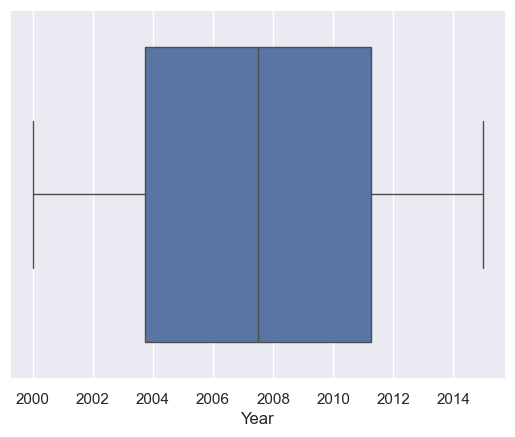

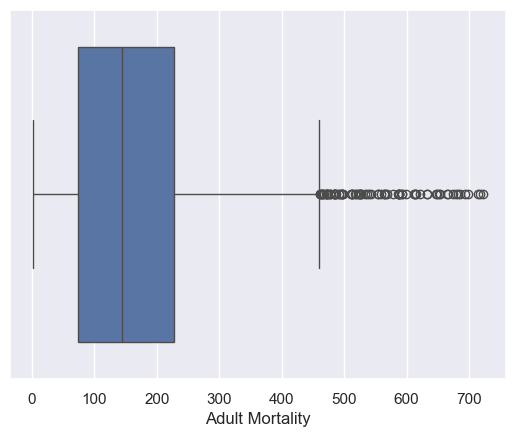

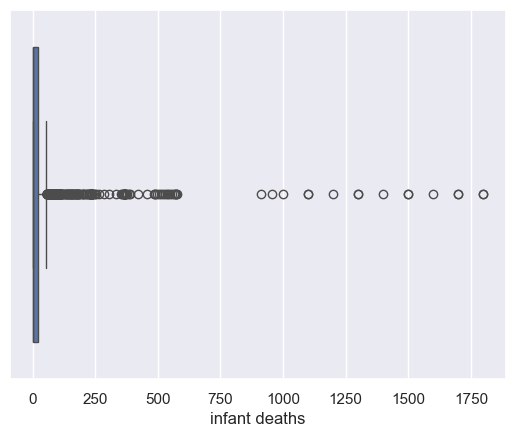

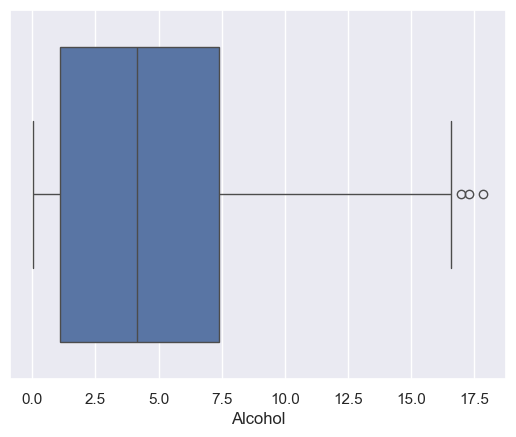

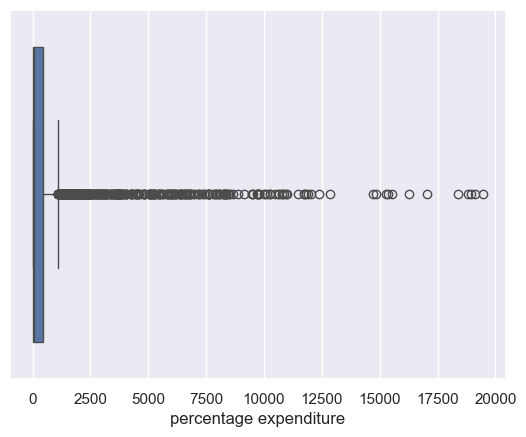

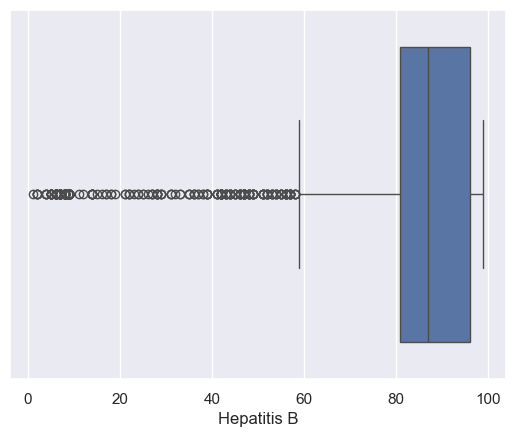

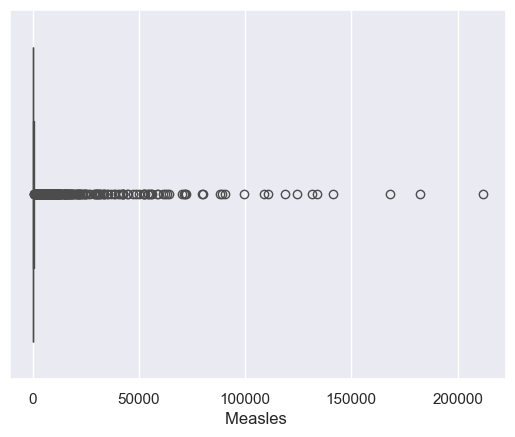

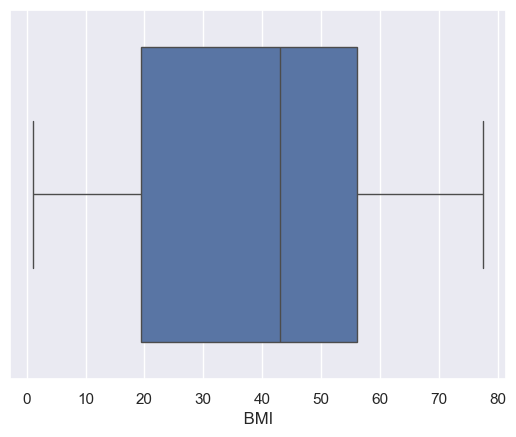

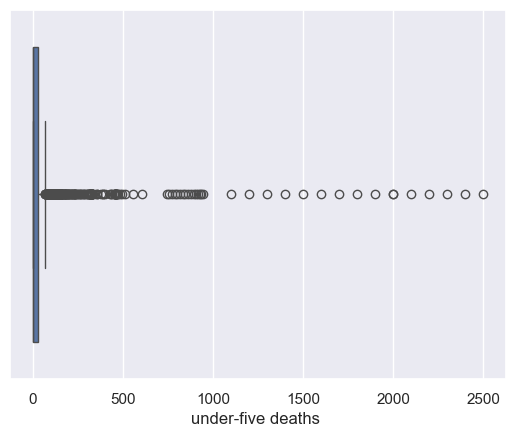

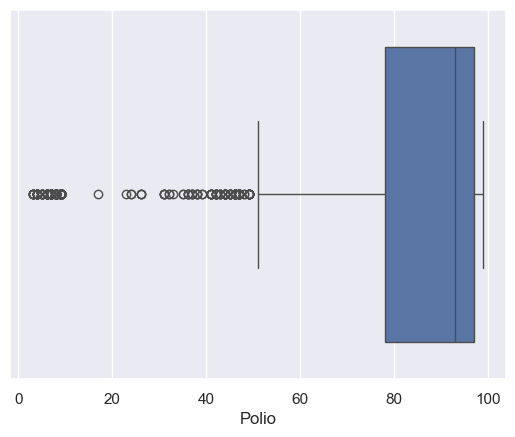

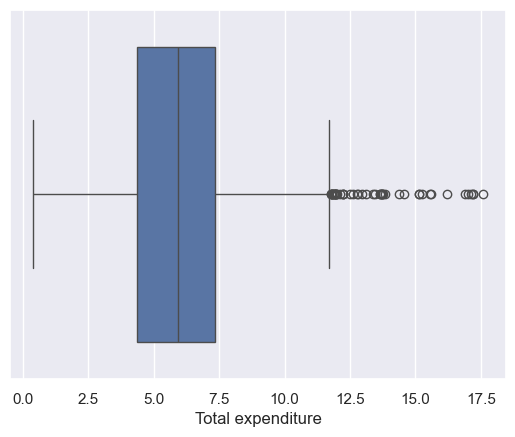

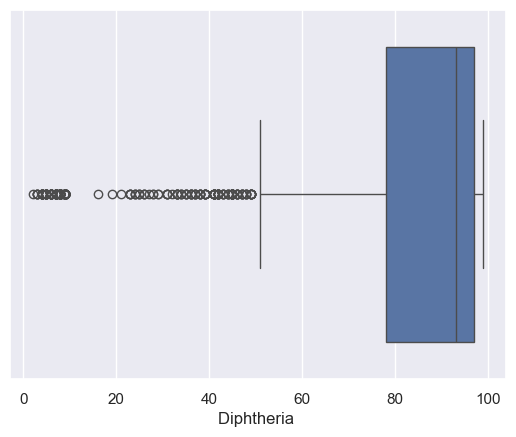

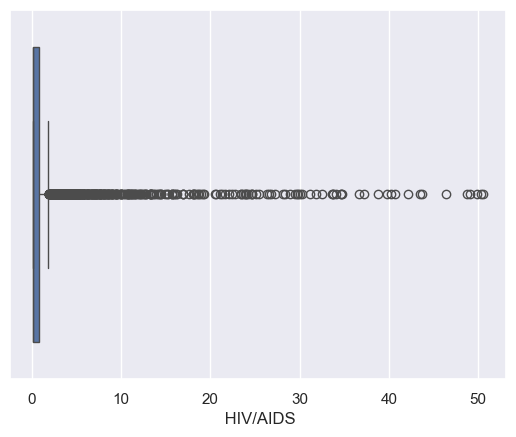

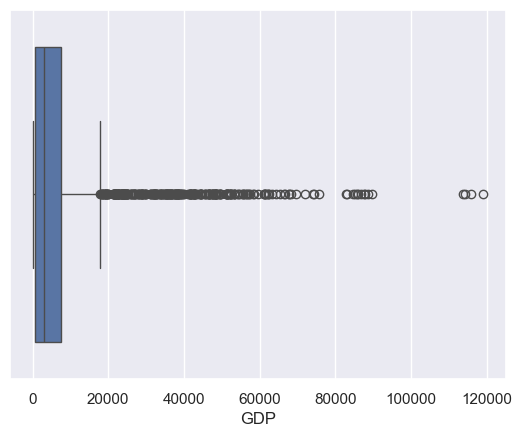

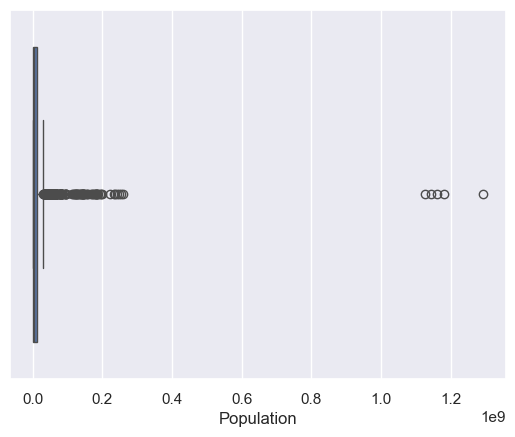

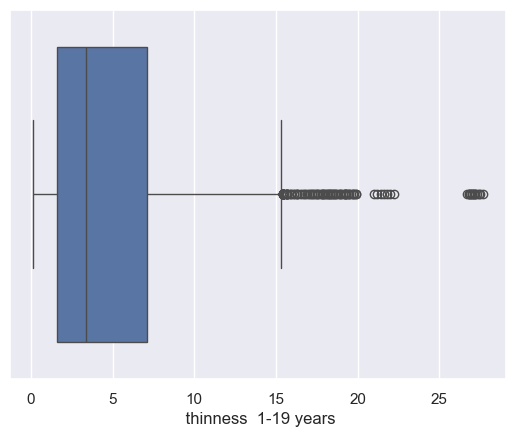

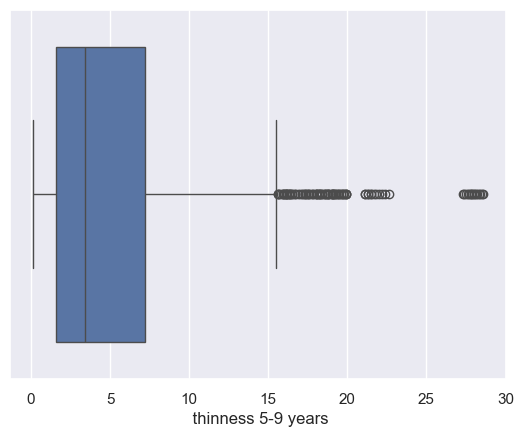

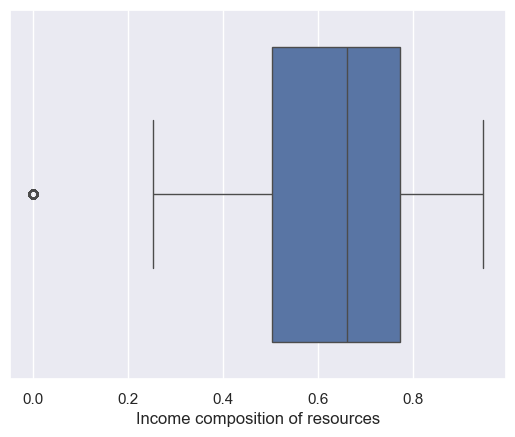

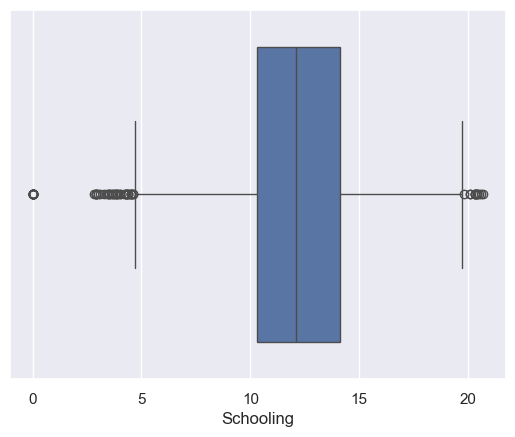

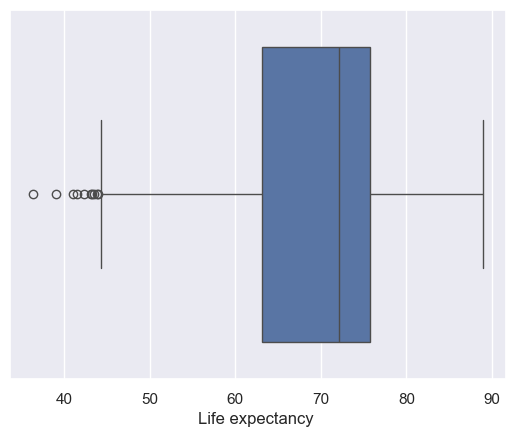

In [13]:
# checking outliers
for column in data.columns:
    if data[column].dtypes != object:
        sns.boxplot(data = data, x = column)
        plt.show()

In [14]:
q1 = data.quantile(0.25, numeric_only = True)
q3 = data.quantile(0.75, numeric_only = True)

IQR = q3 - q1
Upper = q3 + 1.5 * IQR
Lower = q1 - 1.5 * IQR

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


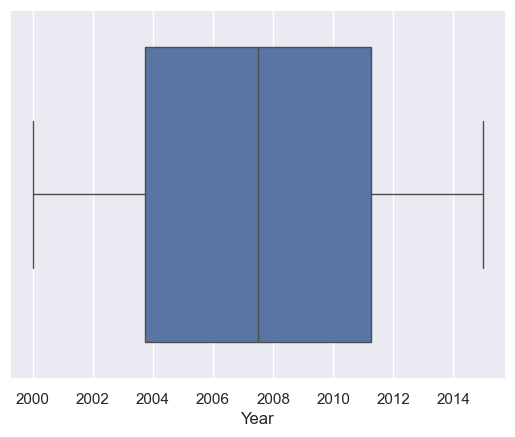

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


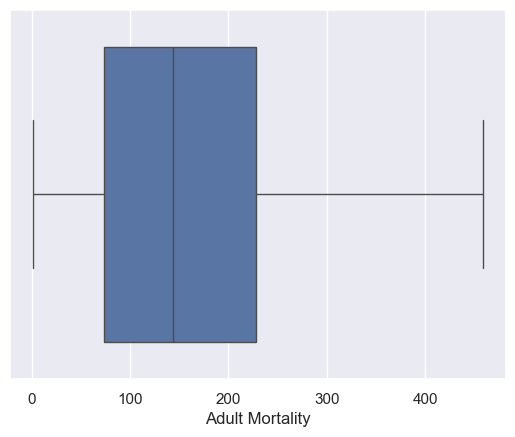

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


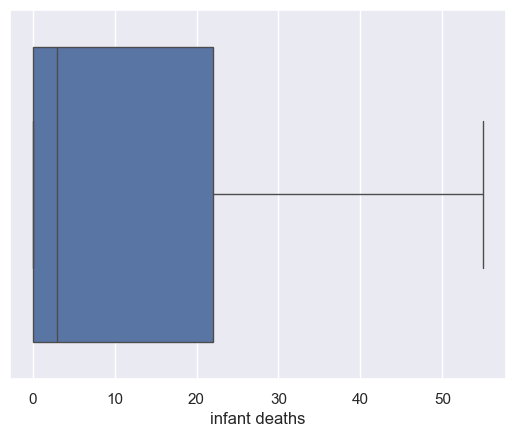

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


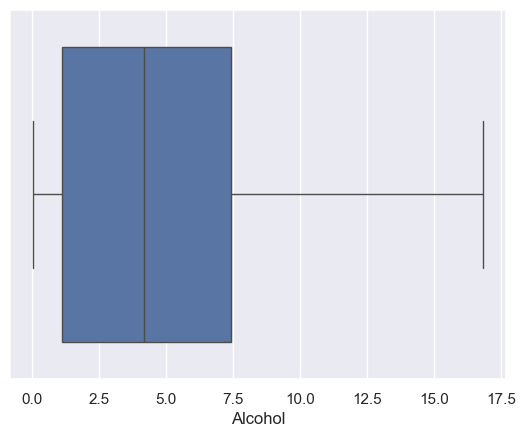

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


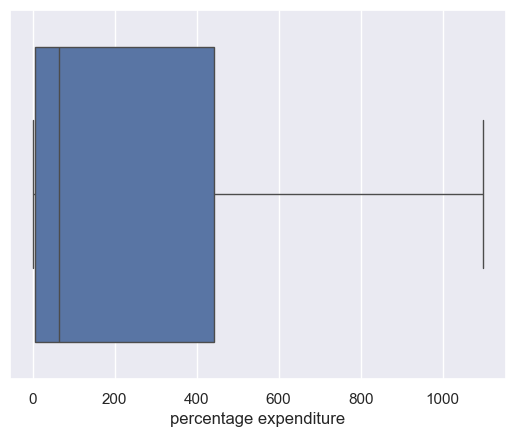

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


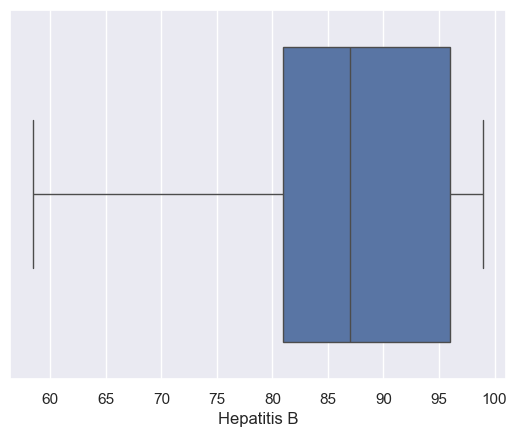

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


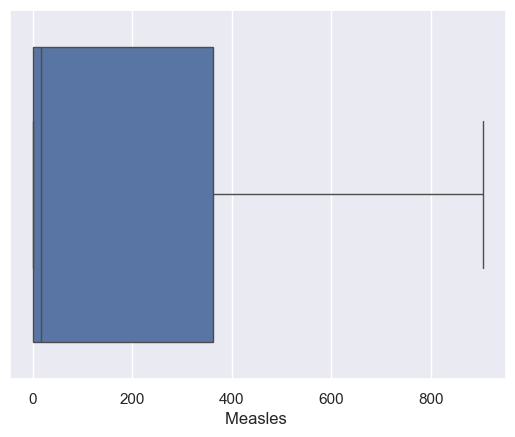

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


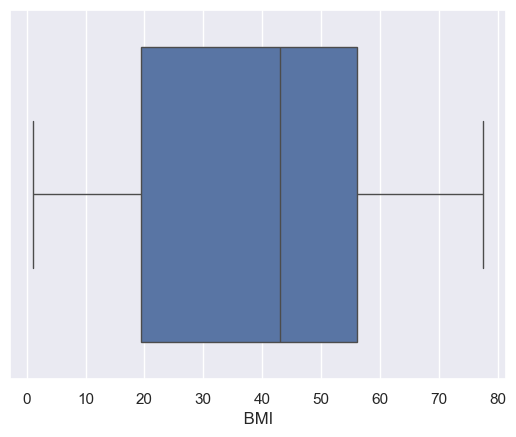

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


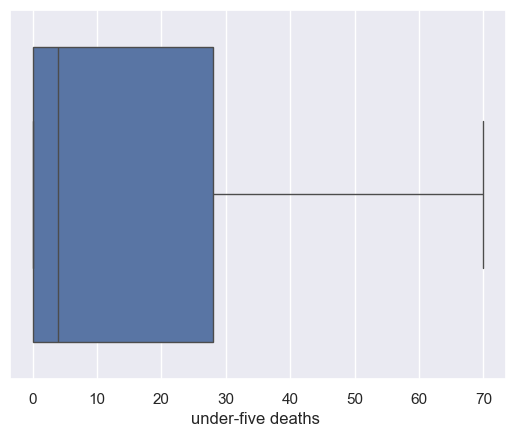

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


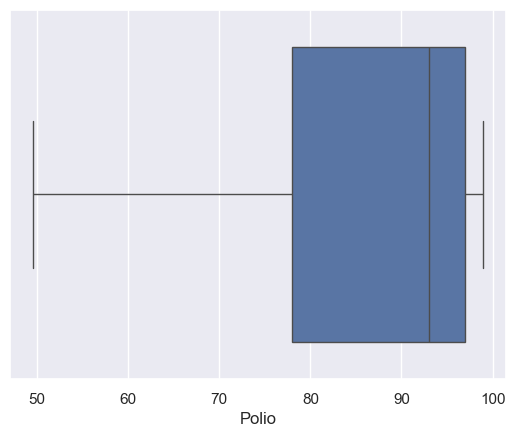

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


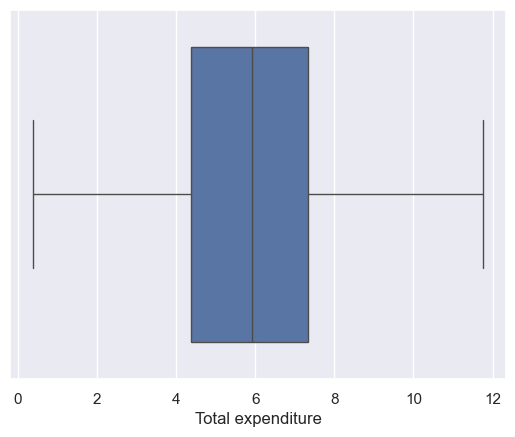

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


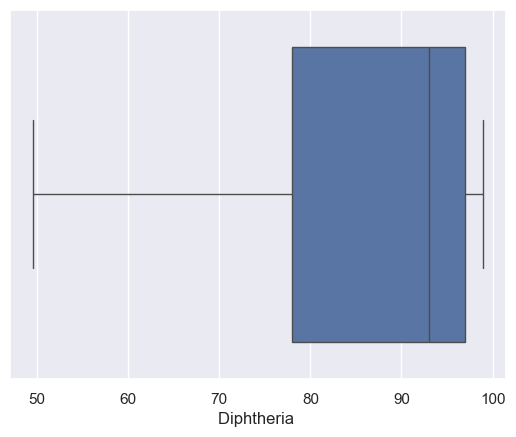

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


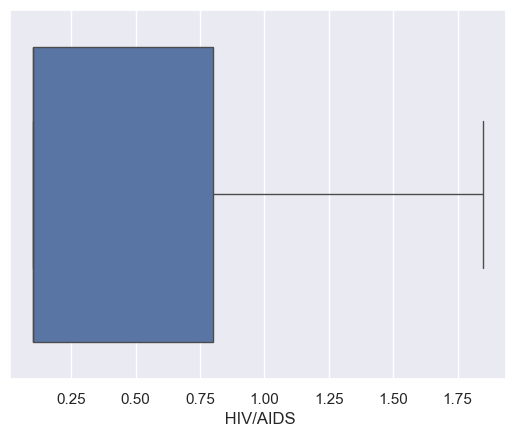

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


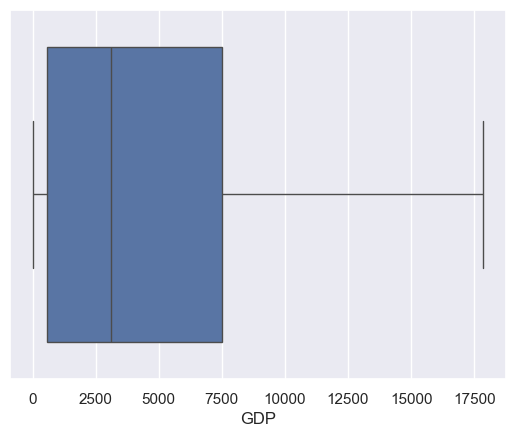

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


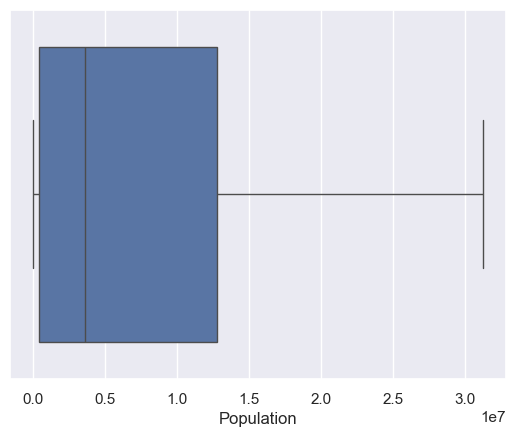

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


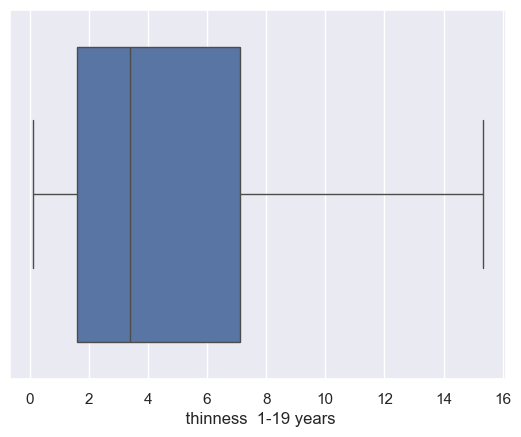

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


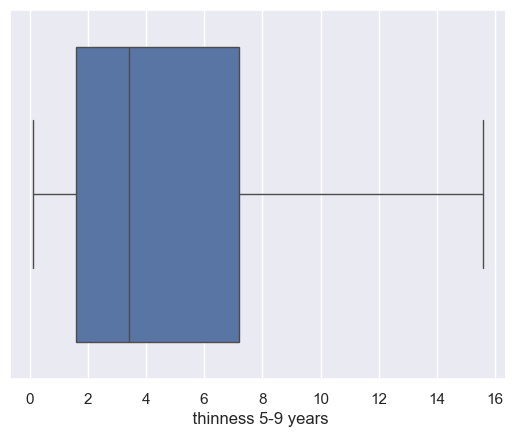

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


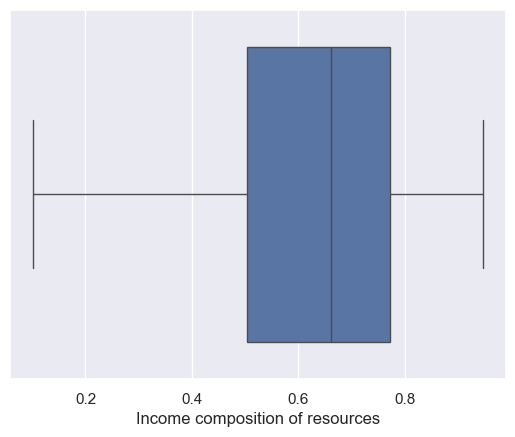

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


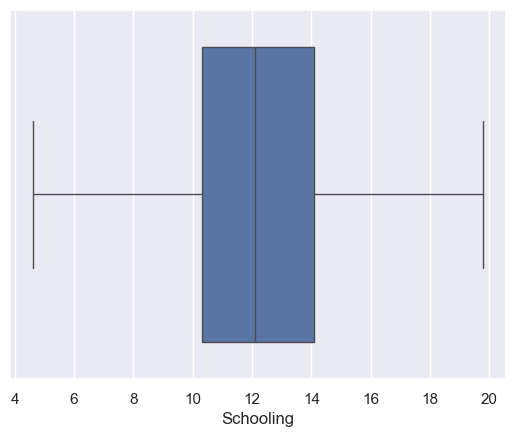

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3450355071.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])


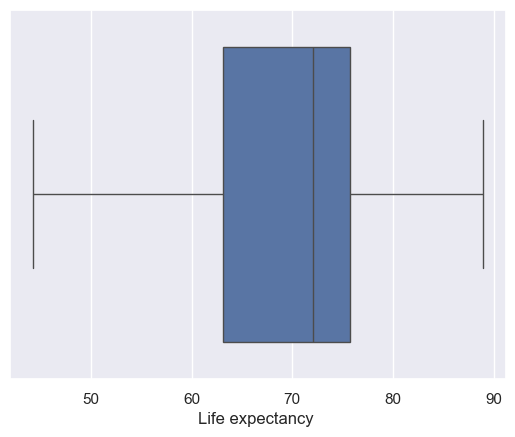

In [15]:
# All outliers has been replace with Upper and Lower boundries

for column in data.columns:
    if data[column].dtypes != object:
        data[column] = np.where(data[column] > Upper[column], Upper[column], data[column])
        data[column] = np.where(data[column] < Lower[column], Lower[column], data[column])
        sns.boxplot(data = data, x = column)
        plt.show()

## Feature Creation

In [16]:
data.head(3)

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,2015.0,Developing,263.0,55.0,0.01,71.279624,65.0,905.625,19.1,70.0,49.5,8.16,65.0,0.1,584.259210,3.128417e+07,15.35,15.6,0.479,10.1,65.0
1,2014.0,Developing,271.0,55.0,0.01,73.523582,62.0,492.000,18.6,70.0,58.0,8.18,62.0,0.1,612.696514,3.275820e+05,15.35,15.6,0.476,10.0,59.9
2,2013.0,Developing,268.0,55.0,0.01,73.219243,64.0,430.000,18.1,70.0,62.0,8.13,64.0,0.1,631.744976,3.128417e+07,15.35,15.6,0.470,9.9,59.9


In [17]:
data.Status.value_counts()

Status
Developing    2416
Developed      512
Name: count, dtype: int64

In [18]:
statistics = ['mean', 'sum', 'min', 'max']

In [19]:
# creating new columns using relationship between Status and infant deaths columns in terms of statistical analysis
for i in statistics:
    result = data.groupby(['Status']).agg({'infant deaths': [i]})
    result.columns = [f'infant_deaths_{i}_by_Status']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Status', how='left')

# creating new columns using relationship between Status and Total expenditure columns in terms of statistical analysis
for i in statistics:
    result = data.groupby(['Status']).agg({'Total expenditure': [i]})
    result.columns = [f'Total_expenditure_{i}_by_Status']
    result.reset_index(inplace=True)
    
    data = pd.merge(data, result, on='Status', how='left')

In [20]:
for column in data.columns[-8:]:
    print(data[column].value_counts())
    print()

infant_deaths_mean_by_Status
16.264487    2416
1.494141      512
Name: count, dtype: int64

infant_deaths_sum_by_Status
39295.0    2416
765.0       512
Name: count, dtype: int64

infant_deaths_min_by_Status
0.0    2928
Name: count, dtype: int64

infant_deaths_max_by_Status
55.0    2416
28.0     512
Name: count, dtype: int64

Total_expenditure_mean_by_Status
5.596482    2416
7.331807     512
Name: count, dtype: int64

Total_expenditure_sum_by_Status
13521.101591    2416
3753.885211      512
Name: count, dtype: int64

Total_expenditure_min_by_Status
0.37    2416
1.10     512
Name: count, dtype: int64

Total_expenditure_max_by_Status
11.77    2928
Name: count, dtype: int64



In [21]:
# these columns have only one unique value
data.drop(columns = ['infant_deaths_min_by_Status', 'Total_expenditure_max_by_Status'], inplace = True)

In [22]:
'''
Population Density: Use population and GDP to calculate population density, which could be indicative of urbanization and its impact on health.
Formula: Population / GDP
'''
data['Popular_Density'] = data['Population'] / data['GDP']


'''
Nutritional Status: Combine BMI and thinness rates to create a feature representing the overall nutritional status of the population.
Formula: (BMI - (Thinness 1-19 years + Thinness 5-9 years)) / 2
'''
data['Nutritional_Status'] = (data[' BMI '] - (data[' thinness  1-19 years'] + data[' thinness 5-9 years'])) / 2

In [23]:
data

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,infant_deaths_mean_by_Status,infant_deaths_sum_by_Status,infant_deaths_max_by_Status,Total_expenditure_mean_by_Status,Total_expenditure_sum_by_Status,Total_expenditure_min_by_Status,Popular_Density,Nutritional_Status
0,2015.0,Developing,263.0,55.0,0.01,71.279624,65.000000,905.625,19.1,70.0,49.5,8.16,65.0,0.10,584.259210,3.128417e+07,15.35,15.6,0.479,10.1,65.0,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,53545.024454,-5.925
1,2014.0,Developing,271.0,55.0,0.01,73.523582,62.000000,492.000,18.6,70.0,58.0,8.18,62.0,0.10,612.696514,3.275820e+05,15.35,15.6,0.476,10.0,59.9,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,534.656216,-6.175
2,2013.0,Developing,268.0,55.0,0.01,73.219243,64.000000,430.000,18.1,70.0,62.0,8.13,64.0,0.10,631.744976,3.128417e+07,15.35,15.6,0.470,9.9,59.9,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,49520.257185,-6.425
3,2012.0,Developing,272.0,55.0,0.01,78.184215,67.000000,905.625,17.6,70.0,67.0,8.52,67.0,0.10,669.959000,3.696958e+06,15.35,15.6,0.463,9.8,59.5,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,5518.185441,-6.675
4,2011.0,Developing,275.0,55.0,0.01,7.097109,68.000000,905.625,17.2,70.0,68.0,7.87,68.0,0.10,63.537231,2.978599e+06,15.35,15.6,0.454,9.5,59.2,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,46879.584664,-6.875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2004.0,Developing,459.0,27.0,4.36,0.000000,68.000000,31.000,27.1,42.0,67.0,7.13,65.0,1.85,454.366654,1.277751e+07,9.40,9.4,0.407,9.2,44.3,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,28121.586141,4.150
2924,2003.0,Developing,459.0,26.0,4.06,0.000000,58.402105,905.625,26.7,41.0,49.5,6.52,68.0,1.85,453.351155,1.263390e+07,9.80,9.9,0.418,9.5,44.5,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,27867.794876,3.500
2925,2002.0,Developing,73.0,25.0,4.43,0.000000,73.000000,304.000,26.3,40.0,73.0,6.53,71.0,1.85,57.348340,1.255250e+05,1.20,1.3,0.427,10.0,44.8,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,2188.816625,11.900
2926,2001.0,Developing,459.0,25.0,1.72,0.000000,76.000000,529.000,25.9,39.0,76.0,6.16,75.0,1.85,548.587312,1.236616e+07,1.60,1.7,0.427,9.8,45.3,16.264487,39295.0,55.0,5.596482,13521.101591,0.37,22541.835601,11.300


## Normal Distribution Check

In [24]:
# checking whether data is normally distributed or not 
for column in data.columns:
    
    if data[column].dtype in ['int64', 'float64']:
        
        kstest_statistic, kstest_p_value = stats.kstest(data[column], 'norm')
        # 'norm' inside indicates that the test is comparing the distribution of the data against a normal distribution
        
        print(f'Column: {column}')
        print(f'Kolmogorov-Smirnov Test:')
        print(f'Test Statistic: {kstest_statistic}')
        print(f'p-value: {kstest_p_value}')
        
        if kstest_p_value > 0.05:
            print('Data looks normally distributed')
            print()
        else:
            print('Data does not look normally distributed')
            print()

Column: Year
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Adult Mortality
Kolmogorov-Smirnov Test:
Test Statistic: 0.9918195008754738
p-value: 0.0
Data does not look normally distributed

Column: infant deaths
Kolmogorov-Smirnov Test:
Test Statistic: 0.5742444035709464
p-value: 0.0
Data does not look normally distributed

Column: Alcohol
Kolmogorov-Smirnov Test:
Test Statistic: 0.6414334841157909
p-value: 0.0
Data does not look normally distributed

Column: percentage expenditure
Kolmogorov-Smirnov Test:
Test Statistic: 0.7668396579846813
p-value: 0.0
Data does not look normally distributed

Column: Hepatitis B
Kolmogorov-Smirnov Test:
Test Statistic: 1.0
p-value: 0.0
Data does not look normally distributed

Column: Measles 
Kolmogorov-Smirnov Test:
Test Statistic: 0.6094219991993618
p-value: 0.0
Data does not look normally distributed

Column:  BMI 
Kolmogorov-Smirnov Test:
Test Statistic: 0.9811537226523659
p-value: 0.0
Da

## Correlation Check

In [25]:
data.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ', 'infant_deaths_mean_by_Status',
       'infant_deaths_sum_by_Status', 'infant_deaths_max_by_Status',
       'Total_expenditure_mean_by_Status', 'Total_expenditure_sum_by_Status',
       'Total_expenditure_min_by_Status', 'Popular_Density',
       'Nutritional_Status'],
      dtype='object')

In [26]:
# since data is not distributed normally, method will be spearman. And if independent columns' correlation with target is more than 40% is selected  
def target_correlation(data, target, threshold=0.4):
    corr_matrix = data.corr(method='spearman', numeric_only = True)
    
    target_correlations = corr_matrix[target].abs() > threshold
    
    variables_explaining_target = target_correlations[target_correlations].index.tolist()

    variables_explaining_target.remove(target)
    
    result_explaining_target = pd.DataFrame(
    {'Variable': variables_explaining_target,
    'Correlation with Target': corr_matrix.loc[variables_explaining_target, target]})
    
    result_explaining_target.reset_index(drop=True, inplace=True)
    
    return result_explaining_target


target_result = target_correlation(data, 'Life expectancy ')

target_result

,Variable,Correlation with Target
0,Adult Mortality,-0.649946
1,infant deaths,-0.602416
2,Alcohol,0.429921
3,percentage expenditure,0.423159
4,BMI,0.583869
5,under-five deaths,-0.621900
6,Polio,0.538488
7,Diphtheria,0.548442
8,HIV/AIDS,-0.751145
9,GDP,0.544089


In [27]:
# if intercorrelation between independent columns are more than 80% will be dropped
def intercorrelation(data, target, threshold=0.8):
    corr_matrix = data.drop(columns=[target]).corr(method='spearman', numeric_only = True)
    
    highly_correlated_variables = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)
    
    independent_variable_pairs = np.where(highly_correlated_variables)
    
    correlated_pairs_set = set()
   
    for var1, var2 in zip(independent_variable_pairs[0], independent_variable_pairs[1]):

        if var1 < var2:
            correlated_pairs_set.add((corr_matrix.index[var1], corr_matrix.columns[var2]))
        else:
            correlated_pairs_set.add((corr_matrix.index[var2], corr_matrix.columns[var1]))
    
    result_intercorrelated_independent = pd.DataFrame(list(correlated_pairs_set), columns=['Variable 1', 'Variable 2'])
    
    return result_intercorrelated_independent

intercorrelated_result = intercorrelation(data, 'Life expectancy ')
intercorrelated_result

,Variable 1,Variable 2
0,Total_expenditure_mean_by_Status,Total_expenditure_sum_by_Status
1,infant deaths,under-five deaths
2,infant_deaths_sum_by_Status,Total_expenditure_min_by_Status
3,Total_expenditure_sum_by_Status,Total_expenditure_min_by_Status
4,infant_deaths_max_by_Status,Total_expenditure_min_by_Status
5,Income composition of resources,Schooling
6,infant_deaths_mean_by_Status,Total_expenditure_min_by_Status
7,BMI,Nutritional_Status
8,infant_deaths_sum_by_Status,Total_expenditure_mean_by_Status
9,infant_deaths_max_by_Status,Total_expenditure_mean_by_Status


In [28]:
# some columns from target correlation will also dropped due to intercorrelation, before passing to VIF checking
target_result.Variable.tolist()

['Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling',
 'infant_deaths_mean_by_Status',
 'infant_deaths_sum_by_Status',
 'infant_deaths_max_by_Status',
 'Total_expenditure_mean_by_Status',
 'Total_expenditure_sum_by_Status',
 'Total_expenditure_min_by_Status',
 'Nutritional_Status']

In [29]:
def calculate_vif(data, variables):
    vif_data = data[variables]
    vif_values = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
    vif_result = pd.DataFrame({'VIF': vif_values, 'Features': variables})
    return vif_result

vif_result = calculate_vif(data, [ 
                                     'Adult Mortality',
                                     'Alcohol',
                                     'percentage expenditure',
                                     ' HIV/AIDS',
                                     'GDP',
                                     'Income composition of resources'
])

vif_result

,VIF,Features
0,4.116984,Adult Mortality
1,3.135603,Alcohol
2,3.465513,percentage expenditure
3,2.606146,HIV/AIDS
4,4.332941,GDP
5,5.604946,Income composition of resources


In [30]:
features = [
    'Adult Mortality',
    'Alcohol',
    'percentage expenditure',
    ' HIV/AIDS',
    'GDP',
    'Income composition of resources',
    'Status',
    'Life expectancy '
]

# after columns from VIF and categoric columns chosen, we can use get dummies method for conversion of categorci columns to numeric columns
data = data[features]
data = pd.get_dummies(data, drop_first = True).astype(float)

In [31]:
data

,Adult Mortality,Alcohol,percentage expenditure,HIV/AIDS,GDP,Income composition of resources,Life expectancy,Status_Developing
0,263.0,0.01,71.279624,0.10,584.259210,0.479,65.0,1.0
1,271.0,0.01,73.523582,0.10,612.696514,0.476,59.9,1.0
2,268.0,0.01,73.219243,0.10,631.744976,0.470,59.9,1.0
3,272.0,0.01,78.184215,0.10,669.959000,0.463,59.5,1.0
4,275.0,0.01,7.097109,0.10,63.537231,0.454,59.2,1.0
...,...,...,...,...,...,...,...,...
2923,459.0,4.36,0.000000,1.85,454.366654,0.407,44.3,1.0
2924,459.0,4.06,0.000000,1.85,453.351155,0.418,44.5,1.0
2925,73.0,4.43,0.000000,1.85,57.348340,0.427,44.8,1.0
2926,459.0,1.72,0.000000,1.85,548.587312,0.427,45.3,1.0


In [32]:
input = data.drop(columns = ['Life expectancy '])
output = data['Life expectancy ']

## Scaling

In [33]:
# we can use scale method for scaling all columns
scaler = StandardScaler()
scaler.fit(input)

inputs_scaled = scaler.transform(input)

data_scaled = pd.DataFrame(inputs_scaled, columns=input.columns)

data_scaled

,Adult Mortality,Alcohol,percentage expenditure,HIV/AIDS,GDP,Income composition of resources,Status_Developing
0,0.871086,-1.176836,-0.547270,-0.630709,-0.813774,-0.795935,0.460348
1,0.940142,-1.176836,-0.541521,-0.630709,-0.808705,-0.811554,0.460348
2,0.914246,-1.176836,-0.542301,-0.630709,-0.805310,-0.842792,0.460348
3,0.948774,-1.176836,-0.529581,-0.630709,-0.798499,-0.879235,0.460348
4,0.974671,-1.176836,-0.711706,-0.630709,-0.906585,-0.926092,0.460348
...,...,...,...,...,...,...,...
2923,2.562974,-0.064996,-0.729889,1.890947,-0.836925,-1.170785,0.460348
2924,2.562974,-0.141674,-0.729889,1.890947,-0.837106,-1.113517,0.460348
2925,-0.769010,-0.047104,-0.729889,1.890947,-0.907688,-1.066660,0.460348
2926,2.562974,-0.739767,-0.729889,1.890947,-0.820132,-1.066660,0.460348


# Train Test Splitting

## Splitting for Linear Regression

In [34]:
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(data_scaled, output, test_size = 0.2, random_state = 42)

## Splitting for other models

In [35]:
new_data = pd.get_dummies(df, drop_first = True).astype(float)
new_data

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy,Status_Developing
0,2015.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,1.0
1,2014.0,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9,1.0
2,2013.0,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9,1.0
3,2012.0,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5,1.0
4,2011.0,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3,1.0
2934,2003.0,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5,1.0
2935,2002.0,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8,1.0
2936,2001.0,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3,1.0


In [36]:
new_data.isnull().sum()

Year                                 0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
Life expectancy                      0
Status_Developing                    0
dtype: int64

In [37]:
# input and outputs for Random Forest, XGB, CatBoost, LGBM, and SVM models
input = new_data.drop(columns = ['Life expectancy '])
output = new_data['Life expectancy ']

X_train, X_test, y_train, y_test = train_test_split(input, output, test_size = 0.2, random_state = 42)

In [38]:
# input and outputs for catboost model with features entered
input_cat = df.drop(columns = ['Life expectancy '])
output_cat = df['Life expectancy ']

In [39]:
df.select_dtypes(include='object').columns

Index(['Status'], dtype='object')

In [40]:
columns_to_fill = ['Status']

input_cat[columns_to_fill] = input_cat[columns_to_fill].fillna('Missing Value')

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(input_cat, output_cat, test_size=0.2, random_state=42)

# Model Building

In [49]:
# function for training and evaluation of the model
def train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test):

        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # calculating metrics for test data
        mae_test  = mean_absolute_error(y_test,y_pred_test)
        mse_test = mean_squared_error(y_test,y_pred_test)
        rmse_test = np.sqrt(mse_test)
        r2_test = r2_score(y_test,y_pred_test)

        # calculating metrics for train data
        mae_train  = mean_absolute_error(y_train,y_pred_train)
        mse_train = mean_squared_error(y_train,y_pred_train)
        rmse_train = np.sqrt(mse_train)
        r2_train = r2_score(y_train,y_pred_train)
    
        # Create a DataFrame to store the results
        results_dict = {
                    'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
                    'Train': [mae_train, mse_train, rmse_train, r2_train],
                    'Test': [mae_test, mse_test, rmse_test, r2_test]
        }
        results_df = pd.DataFrame(results_dict)
    
        print(f'Model Performance for {model_name}')
        print(results_df)
        print()
    
        return r2_train.round(3), r2_test.round(3)

In [50]:
# taken 'models' list and models added to it
models = []

# all models created
lin_regr_model = LinearRegression()
xgb_model_def = XGBRegressor()
lgb_model_def = LGBMRegressor()
catboost_model_def = CatBoostRegressor()
catboost_model_custom = CatBoostRegressor(cat_features=['Status'])
random_forest_def = RandomForestRegressor()
svr_model = SVR(kernel='rbf')


models.extend([
    ('Linear Regression', lin_regr_model),
    ('XGBoost', xgb_model_def),
    ('LightGBM', lgb_model_def),
    ('CatBoost', catboost_model_def),
    ('CatBoost_Custom', catboost_model_custom),
    ('Random Forest', random_forest_def),
    ('Support Vector Machine', SVR(kernel='rbf'))
])

In [51]:
r2_df = pd.DataFrame(columns=['Model', 'R2_train', 'R2_test'])

for model_name, model in models:
    if model_name == 'CatBoost_Custom':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name == 'Linear Regression':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_lin, y_train_lin, X_test_lin, y_test_lin)
    elif model_name in ['Random Forest', 'Support Vector Machine']:
        X_train_filled = X_train.copy() 
        X_test_filled = X_test.copy()   
        for i in X_train.columns:
            if X_train[i].dtypes==object:
                X_train_filled[i].fillna(X_train[i].mode()[0], inplace=True)
                X_test_filled[i].fillna(X_test[i].mode()[0], inplace=True)
            else:
                X_train_filled[i].fillna(X_train[i].mean(), inplace=True)
                X_test_filled[i].fillna(X_test[i].mean(), inplace=True)
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_filled, y_train, X_test_filled, y_test)
        
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if r2_train is not None:
        r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)
        
r2_df_sorted = r2_df.sort_values(by='R2_test', ascending=False)

Model Performance for Linear Regression
  Metric      Train       Test
0    MAE   3.035259   2.964853
1    MSE  16.647418  15.666967
2   RMSE   4.080125   3.958152
3     R2   0.817413   0.818447



C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\857652325.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df = pd.concat([r2_df, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)


Model Performance for XGBoost
  Metric     Train      Test
0    MAE  0.155057  1.144441
1    MSE  0.047773  2.903539
2   RMSE  0.218569  1.703977
3     R2  0.999479  0.966433

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000650 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 20
[LightGBM] [Info] Start training from score 69.149018
Model Performance for LightGBM
  Metric     Train      Test
0    MAE  0.574273  1.130228
1    MSE  0.772216  2.883790
2   RMSE  0.878758  1.698173
3     R2  0.991578  0.966661

Learning rate set to 0.046835
0:	learn: 9.2265882	total: 7.96ms	remaining: 7.96s
1:	learn: 8.9181736	total: 15.9ms	remaining: 7.94s
2:	learn: 8.6028063	total: 24.1ms	remaining: 8.03s
3:	learn: 8.3080251	total: 31.6ms	remainin

C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\857652325.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_filled[i].fillna(X_train[i].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\857652325.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Model Performance for Random Forest
  Metric     Train      Test
0    MAE  0.436785  1.068718
1    MSE  0.495194  2.833158
2   RMSE  0.703700  1.683199
3     R2  0.994599  0.967247



C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\857652325.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train_filled[i].fillna(X_train[i].mean(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\857652325.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Model Performance for Support Vector Machine
  Metric      Train       Test
0    MAE   7.537057   7.199887
1    MSE  99.409174  91.829234
2   RMSE   9.970415   9.582757
3     R2  -0.084204  -0.061617



# Model Optimization

### XGBoost tuning

In [52]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
         # Using a fraction of the data can help to prevent overfitting and improve generalization.
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5,1),
        'gamma': trial.suggest_int('gamma', 0,5)
        # Increasing the gamma value can help to prevent overfitting
        # Should be used only when you are using high depth
}
    xgb_reg = XGBRegressor(**param)

    auc = cross_val_score(xgb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_xgb_model = XGBRegressor(**best_params)

[I 2024-05-17 03:30:18,418] A new study created in memory with name: no-name-2eaf2753-8a8e-4b0d-844f-4c0f61d4b86d
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3531340600.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3531340600.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5,1), #  fraction of the training data used to train each tree.
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3531340600.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See h

Best trial:
  Value: 0.959
  Params:  {'n_estimators': 476, 'learning_rate': 0.024505767385237416, 'max_depth': 6, 'subsample': 0.8625923180830766, 'colsample_bytree': 0.6054421579308517, 'gamma': 2}


### LightGBM tuning

In [53]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'num_leaves': trial.suggest_int('num_leaves', 10, 100)
    }

    lgb_reg = LGBMRegressor(**param)

    auc = cross_val_score(lgb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_lgb_model = LGBMRegressor(**best_params)

[I 2024-05-17 03:31:56,088] A new study created in memory with name: no-name-af2fa081-e468-42fc-b352-b82265d87041
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\1177000557.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
[I 2024-05-17 03:32:01,410] Trial 0 finished with value: 0.9520377125186705 and parameters: {'n_estimators': 789, 'learning_rate': 0.27560464817109454, 'max_depth': 8, 'num_leaves': 52}. Best is trial 0 with value: 0.9520377125186705.
[I 2024-05-17 03:32:02,915] Trial 1 finished with value: 0.9503738746773585 and parameters: {'n_estimators': 434, 'learning_rate': 0.2427948012250942, 'max_depth': 3, 'num_leaves': 26}. Best is trial 0 with value: 0.9520377125186705.
[I 2024-05-17 03:32:06,117] Trial 2 finished with value: 0.95495544597416

Best trial:
  Value: 0.955
  Params:  {'n_estimators': 704, 'learning_rate': 0.1280632676419729, 'max_depth': 7, 'num_leaves': 14}


### Catboost tuning

In [54]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_reg = CatBoostRegressor(**param)

    auc = cross_val_score(cb_reg, X_train, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model = CatBoostRegressor(**best_params)

[I 2024-05-17 03:32:44,522] A new study created in memory with name: no-name-ca5de9fd-cbe4-430f-9f9a-a4c27abf3c50
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\277029420.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\277029420.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-17 03:35:37,190] Trial 0 finished with value: 0.9521456936491309 and parameters: {'iterations': 880, 'learnin

Best trial:
  Value: 0.959
  Params:  {'iterations': 650, 'learning_rate': 0.09409843467365842, 'depth': 4, 'l2_leaf_reg': 1.1406468605884157, 'loss_function': 'RMSE'}


### Catboost tuning (with categoric features entered)

In [55]:
def best_params_for_model(trial):

    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
        'cat_features': ['Status'],  # Handle categorical features separately
        'loss_function': trial.suggest_categorical('loss_function', ['RMSE']) # For regression tasks, use ‘RMSE,’ while for classification, use ‘Logloss’.
    }

    cb_reg_ = CatBoostRegressor(**param)

    auc = cross_val_score(cb_reg_, X_train_cat, y_train_cat, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc



study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=5)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_cb_model_custom = CatBoostRegressor(**best_params)

[I 2024-05-17 03:39:38,936] A new study created in memory with name: no-name-cc610999-96df-4859-9a3e-24e338b42f2a
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3446995405.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\3446995405.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10), # Regularization term that prevents overfitting by penalizing large parameter values.
[I 2024-05-17 03:39:42,256] Trial 0 finished with value: 0.9191214832448126 and parameters: {'iterations': 674, 'learn

Best trial:
  Value: 0.959
  Params:  {'iterations': 729, 'learning_rate': 0.05707885755730965, 'depth': 5, 'l2_leaf_reg': 2.3855802547721754, 'loss_function': 'RMSE'}


### Random Forest tuning

In [56]:
def best_params_for_model(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
    }

    rf_reg = RandomForestRegressor(**param)

    auc = cross_val_score(rf_reg, X_train_filled, y_train, cv=3, scoring='r2', n_jobs=-1).mean()
    return auc

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=10)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value)) 
print('  Params: ', best_params)

best_rf_model = RandomForestRegressor(**best_params)

[I 2024-05-17 03:41:03,995] A new study created in memory with name: no-name-7584b361-ec3b-4fd1-9415-895277c65708
[I 2024-05-17 03:41:13,511] Trial 0 finished with value: 0.9247389673307241 and parameters: {'n_estimators': 805, 'max_depth': 9, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9247389673307241.
[I 2024-05-17 03:41:19,064] Trial 1 finished with value: 0.9239502558290514 and parameters: {'n_estimators': 480, 'max_depth': 8, 'min_samples_split': 13, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.9247389673307241.
[I 2024-05-17 03:41:25,617] Trial 2 finished with value: 0.8497061281641379 and parameters: {'n_estimators': 844, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 0 with value: 0.9247389673307241.
[I 2024-05-17 03:41:31,027] Trial 3 finished with value: 0.9219913617483382 and parameters: {'n_estimators': 511, 'max_depth': 6, 'm

Best trial:
  Value: 0.944
  Params:  {'n_estimators': 698, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


### SVM tuning

In [58]:
def best_params_for_model(trial):

    param = {
        'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),  # Kernel type
        'degree': trial.suggest_int('degree', 2, 5),  # Degree for polynomial kernel
        'gamma': trial.suggest_categorical('gamma', ['scale']),  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
        'epsilon': trial.suggest_loguniform('epsilon', 0.01, 1.0)  # Epsilon in the epsilon-SVR model
    }

    svr = SVR(**param)

    score = cross_val_score(svr, X_train_filled, y_train, cv=3, scoring='r2', n_jobs=-1).mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(best_params_for_model, n_trials=1)

print('Best trial:')
best_params = study.best_params
print('  Value: {:.3f}'.format(study.best_value))
print('  Params: ', best_params)

best_svr_model = SVR(**best_params)

[I 2024-05-17 04:45:15,307] A new study created in memory with name: no-name-4800c1aa-3cb4-4e8d-9b1f-32a5b3aca682
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\1909555688.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'C': trial.suggest_loguniform('C', 0.1, 10),  # Regularization parameter
C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\1909555688.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'epsilon': trial.suggest_loguniform('epsilon', 0.01, 1.0)  # Epsilon in the epsilon-SVR model
[I 2024-05-17 04:45:18,462] Trial 0 finished with value: -0.09078955930535952 and parameters: {'C': 9.791162792808532, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'epsi

Best trial:
  Value: -0.091
  Params:  {'C': 9.791162792808532, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale', 'epsilon': 0.0959738535993159}


In [66]:
# optimized models created and added to the list
models_optimized = []

models_optimized.extend([
    ('XGBoost Optuna', best_xgb_model),
    ('LightGBM Optuna', best_lgb_model),
    ('CatBoost Optuna', best_cb_model),
    ('CatBoost Custom Optuna', best_cb_model_custom),
    ('RandomForest Optuna', best_rf_model),
    ('SVM Optuna', best_svr_model)
])

In [67]:
r2_df_optuna = pd.DataFrame(columns=['Model', 'R2_train', 'R2_test'])

for model_name, model in models_optimized:
    if model_name == 'CatBoost_Custom':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_cat, y_train_cat, X_test_cat, y_test_cat)
    elif model_name == 'Linear Regression':
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_lin, y_train_lin, X_test_lin, y_test_lin)
    elif model_name in ['Random Forest', 'SVM Optuna']:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train_filled, y_train, X_test_filled, y_test)
    else:
        r2_train, r2_test = train_and_evaluate_model(model_name, model, X_train, y_train, X_test, y_test)
    if r2_train is not None:
        r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)
        
r2_df_sorted_optuna = r2_df_optuna.sort_values(by='R2_test', ascending=False)

Model Performance for XGBoost Optuna
  Metric     Train      Test
0    MAE  0.524435  1.057583
1    MSE  0.594906  2.560806
2   RMSE  0.771301  1.600252
3     R2  0.993512  0.970395

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3362
[LightGBM] [Info] Number of data points in the train set: 2342, number of used features: 20
[LightGBM] [Info] Start training from score 69.149018
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


C:\Users\Admin\AppData\Local\Temp\ipykernel_2940\2864106578.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  r2_df_optuna = pd.concat([r2_df_optuna, pd.DataFrame({'Model': [model_name], 'R2_train': [r2_train], 'R2_test': [r2_test]})], ignore_index=True)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [68]:
final_review = pd.concat([r2_df_sorted,r2_df_sorted_optuna], axis=0)

final_review_sorted = final_review.sort_values(by='R2_test', ascending=False)
final_review_sorted.reset_index(drop=True, inplace=True)

final_review_sorted

,Model,R2_train,R2_test
0,XGBoost Optuna,0.994,0.970
1,CatBoost_Custom,0.993,0.969
2,CatBoost,0.993,0.968
3,LightGBM Optuna,0.999,0.968
4,LightGBM,0.992,0.967
5,Random Forest,0.995,0.967
6,XGBoost,0.999,0.966
7,CatBoost Custom Optuna,0.988,0.966
8,CatBoost Optuna,0.989,0.964
9,RandomForest Optuna,0.977,0.958


# Stacking Regressor

In [73]:
# Define the base classifiers
reg1 = catboost_model_def
reg2 = best_lgb_model
 
# Define the meta classifier
meta_regressor = best_xgb_model

In [74]:
# Define the stacking classifier
stacking_reg = StackingCVRegressor(regressors = [reg1, reg2],
                                           meta_regressor=meta_regressor,
                                           cv=5,
                                           use_features_in_secondary=True,
                                           verbose=1,
                                           random_state=42)

In [76]:
train_and_evaluate_model('Stacking Regressor with XGB, Catboost and LGBM', stacking_reg, X_train_filled, y_train, X_test, y_test)

Learning rate set to 0.045211
0:	learn: 9.2601432	total: 11.1ms	remaining: 11s
1:	learn: 8.9606557	total: 20.8ms	remaining: 10.4s
2:	learn: 8.6505867	total: 29.3ms	remaining: 9.75s
3:	learn: 8.3612371	total: 37.2ms	remaining: 9.27s
4:	learn: 8.0972429	total: 45.3ms	remaining: 9.02s
5:	learn: 7.8362494	total: 53.2ms	remaining: 8.81s
6:	learn: 7.6061539	total: 61ms	remaining: 8.65s
7:	learn: 7.3541542	total: 68.3ms	remaining: 8.46s
8:	learn: 7.1265092	total: 77ms	remaining: 8.48s
9:	learn: 6.9174665	total: 85.4ms	remaining: 8.46s
10:	learn: 6.6943666	total: 93ms	remaining: 8.36s
11:	learn: 6.5030792	total: 101ms	remaining: 8.32s
12:	learn: 6.3074210	total: 109ms	remaining: 8.29s
13:	learn: 6.1314686	total: 117ms	remaining: 8.24s
14:	learn: 5.9476497	total: 125ms	remaining: 8.18s
15:	learn: 5.8050931	total: 133ms	remaining: 8.15s
16:	learn: 5.6530978	total: 140ms	remaining: 8.09s
17:	learn: 5.5012342	total: 148ms	remaining: 8.09s
18:	learn: 5.3443928	total: 156ms	remaining: 8.07s
19:	lear

(0.993, 0.963)

# Univariate Analysis

In [78]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single_var = X_train[[i]]
    X_test_single_var = X_test[[i]]

    # Fit a regression model using the single variable on the training set
    best_xgb_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = best_xgb_model.predict(X_train_single_var)

    # Calculate R2 for the single variable model on the training set
    train_r2 = r2_score(y_train, y_pred_train_single_var)

    # Fit a regression model using the single variable on the test set
    y_pred_test_single_var = best_xgb_model.predict(X_test_single_var)

    # Calculate R2 for the single variable model on the test set
    test_r2 = r2_score(y_test, y_pred_test_single_var)

    # Append the results to the lists
    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Create a DataFrame from the results

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted


,Variable,Train R2,Test R2
1,Adult Mortality,0.8161,0.8372
12,HIV/AIDS,0.6840,0.6602
17,Income composition of resources,0.7235,0.6544
18,Schooling,0.6046,0.5759
7,BMI,0.6011,0.4664
9,Polio,0.4283,0.4111
16,thinness 5-9 years,0.5281,0.3983
11,Diphtheria,0.4345,0.3975
15,thinness 1-19 years,0.5212,0.3972
2,infant deaths,0.4584,0.3944


In [80]:
df.columns

Index(['Year', 'Status', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [81]:
# the columns that are not overfitting and test r2_score is higher than 35% are chosen
selected_features = [
                        'Adult Mortality', 
                        ' HIV/AIDS',
                        'Income composition of resources',
                        'Schooling',
                        'Polio',
                        'infant deaths',
]

In [82]:
fin_input = new_data[selected_features]
fin_output = new_data['Life expectancy ']

X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(fin_input, fin_output, test_size=0.2, random_state=42)

In [83]:
train_and_evaluate_model('XGB with Optuna for selected features', best_cb_model, X_train_uni, y_train_uni, X_test_uni, y_test_uni)

0:	learn: 8.8870584	total: 3.55ms	remaining: 2.3s
1:	learn: 8.2807412	total: 6.71ms	remaining: 2.17s
2:	learn: 7.7498029	total: 9.51ms	remaining: 2.05s
3:	learn: 7.2577414	total: 12.9ms	remaining: 2.09s
4:	learn: 6.8035629	total: 16.5ms	remaining: 2.13s
5:	learn: 6.4135736	total: 18.9ms	remaining: 2.03s
6:	learn: 6.0603667	total: 21.3ms	remaining: 1.96s
7:	learn: 5.7207047	total: 24.6ms	remaining: 1.97s
8:	learn: 5.4196521	total: 27.6ms	remaining: 1.97s
9:	learn: 5.1640499	total: 30.1ms	remaining: 1.93s
10:	learn: 4.9026659	total: 33.4ms	remaining: 1.94s
11:	learn: 4.6861037	total: 35.9ms	remaining: 1.91s
12:	learn: 4.5138103	total: 39.3ms	remaining: 1.93s
13:	learn: 4.3457632	total: 41.4ms	remaining: 1.88s
14:	learn: 4.1903002	total: 44.7ms	remaining: 1.89s
15:	learn: 4.0339762	total: 47.6ms	remaining: 1.89s
16:	learn: 3.8959777	total: 51.2ms	remaining: 1.91s
17:	learn: 3.7772457	total: 54.9ms	remaining: 1.93s
18:	learn: 3.6854809	total: 58.3ms	remaining: 1.94s
19:	learn: 3.5933292	to

(0.98, 0.961)